# Loading the dataset

In [ ]:
install.packages("fredr")
library(fredr)

install.packages("ggplot2")
library(ggplot2)

install.packages("forecast")
library(forecast)

install.packages("graphics")
library(graphics)

install.packages("dplyr")
library(dplyr)

library(tseries)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
fredr_set_key("d12020aa815dd3c82d419e68256020c4")

In [ ]:
data2<-fredr(series_id = "HOOVMN03JPM661N", observation_start = as.Date("2002-01-01"), observation_end = as.Date("2021-01-12"))

In [ ]:
# display the the class of the object data2
class(data2)

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
# display the structure of the object data2
str(data2)

tibble [229 × 5] (S3: tbl_df/tbl/data.frame)
 $ date          : Date[1:229], format: "2002-01-01" "2002-02-01" ...
 $ series_id     : chr [1:229] "HOOVMN03JPM661N" "HOOVMN03JPM661N" "HOOVMN03JPM661N" "HOOVMN03JPM661N" ...
 $ value         : num [1:229] 70.5 78.9 83.6 86.3 81.7 ...
 $ realtime_start: Date[1:229], format: "2023-05-10" "2023-05-10" ...
 $ realtime_end  : Date[1:229], format: "2023-05-10" "2023-05-10" ...


In [ ]:
data2$date<-as.Date(data2$date, format="%m/%d/%Y")
head(data2)

date,series_id,value,realtime_start,realtime_end
<date>,<chr>,<dbl>,<date>,<date>
2002-01-01,HOOVMN03JPM661N,70.49867,2023-05-10,2023-05-10
2002-02-01,HOOVMN03JPM661N,78.87324,2023-05-10,2023-05-10
2002-03-01,HOOVMN03JPM661N,83.59345,2023-05-10,2023-05-10
2002-04-01,HOOVMN03JPM661N,86.25809,2023-05-10,2023-05-10
2002-05-01,HOOVMN03JPM661N,81.69014,2023-05-10,2023-05-10
2002-06-01,HOOVMN03JPM661N,85.11610,2023-05-10,2023-05-10


The dataframe contains 6 different columns. We will ony be conducting our study on the date and value columns; which will represent the times series.

# Statistical and graphical analysis of the time series

In [ ]:
# Mean of the values in data1
mean(data2$value)

[1] 94.503

In [ ]:
# Variance of the values in data1
var(data2$value)

[1] 129.9981

In [ ]:
# Check for NAs in the time series
any(is.na(data2))

[1] FALSE

There are no missing values in the dataframe.

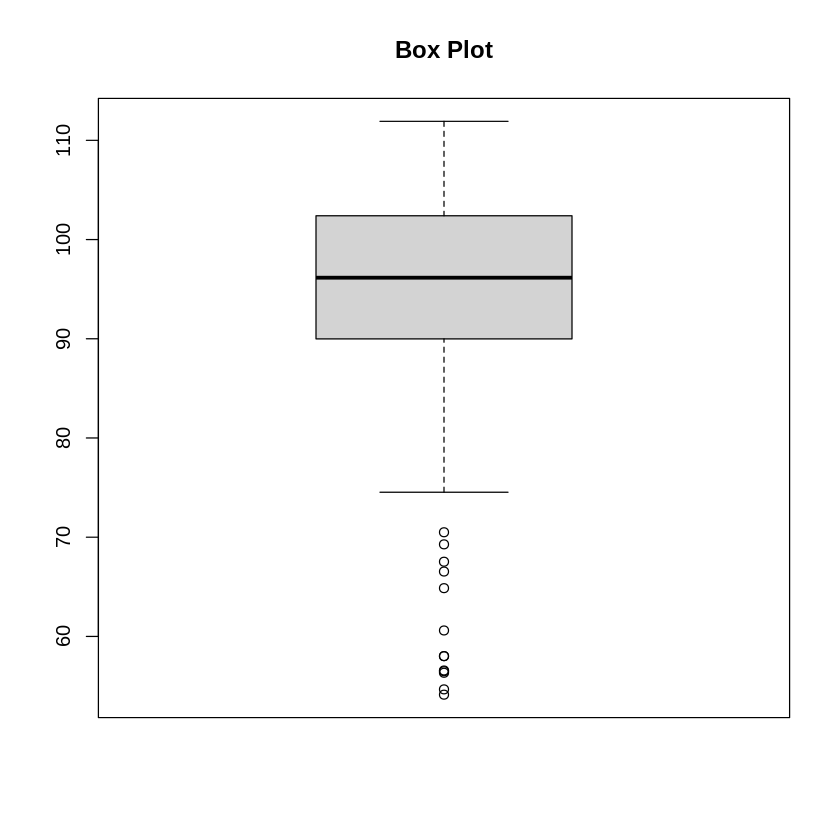

In [ ]:
# Display the boxplot
boxplot (data2$value, data = data2, main = "Box Plot")

The boxplot reveals several outliers below the threshold of 70.


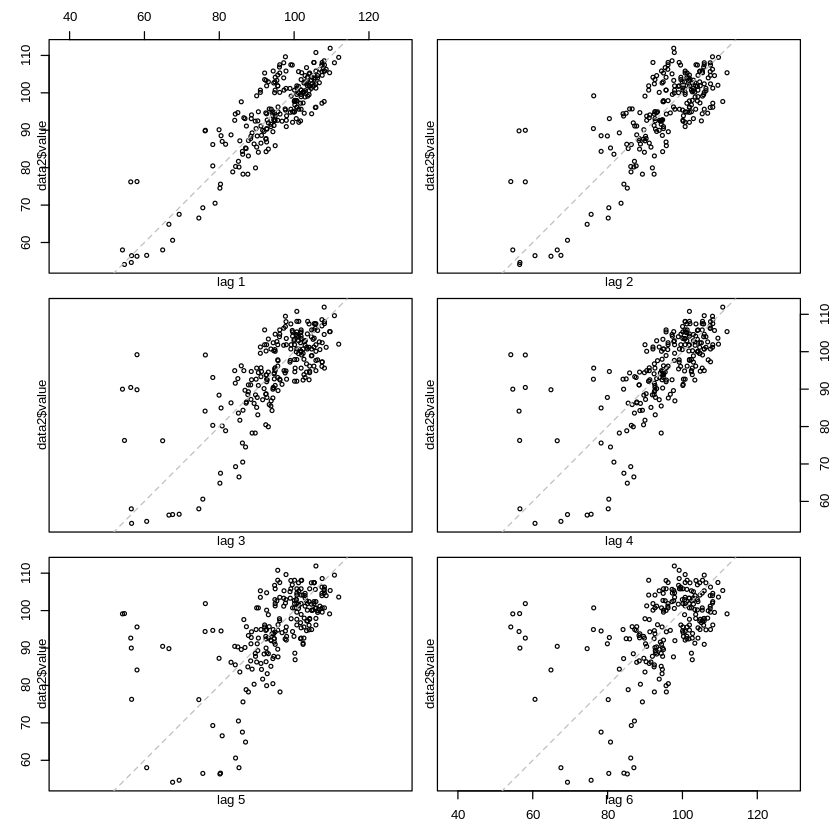

In [ ]:
# Create a lag plot with the first 6 lags
library(graphics)
lag.plot(data2$value, 6)

There is a correlation between the values of the time series and its past values; which suggests that we can use the autoregressive model to capture this correlation.

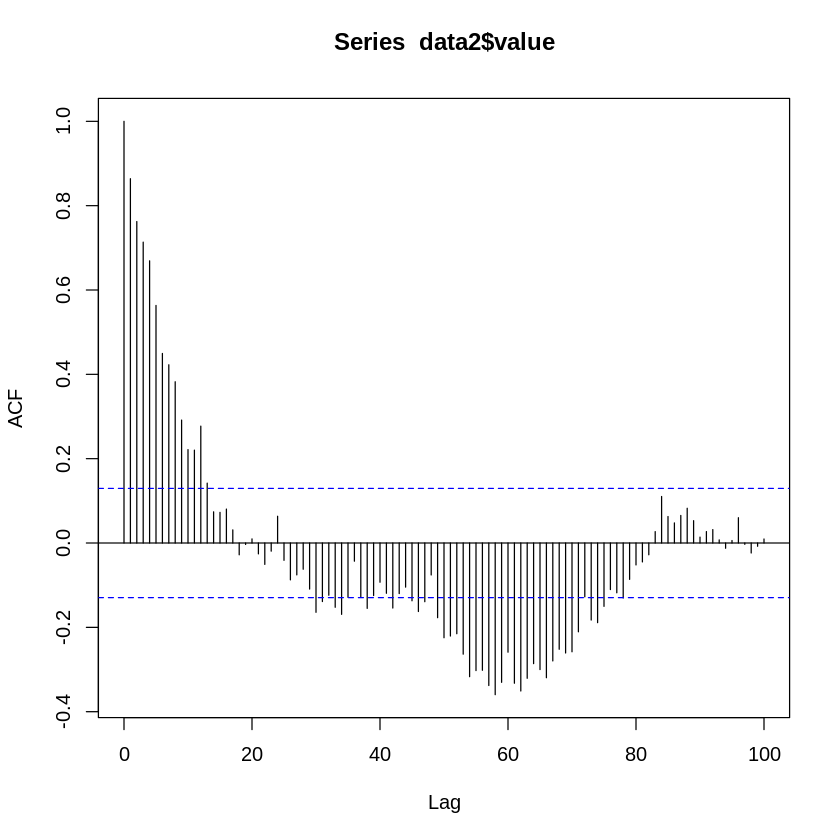

In [ ]:
# compute and display the autocorrelation (ACF) of the time series data1$value up to a maximum lag of 100
acf(data2$value, lag.max = 100)

the autocorrelation function (ACF) of the time series is irregular, there may be some unusual or unexpected patterns in the data; The times series should be preprocessed before modelling.


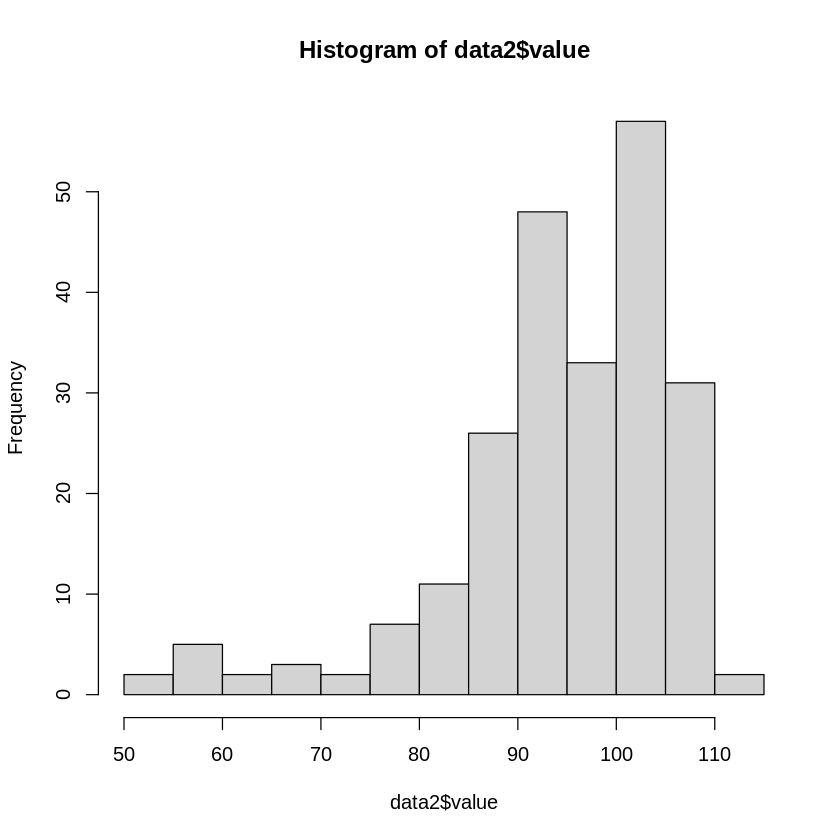

In [ ]:
# Histogram of the value column in the times seies data1
hist(data2$value)

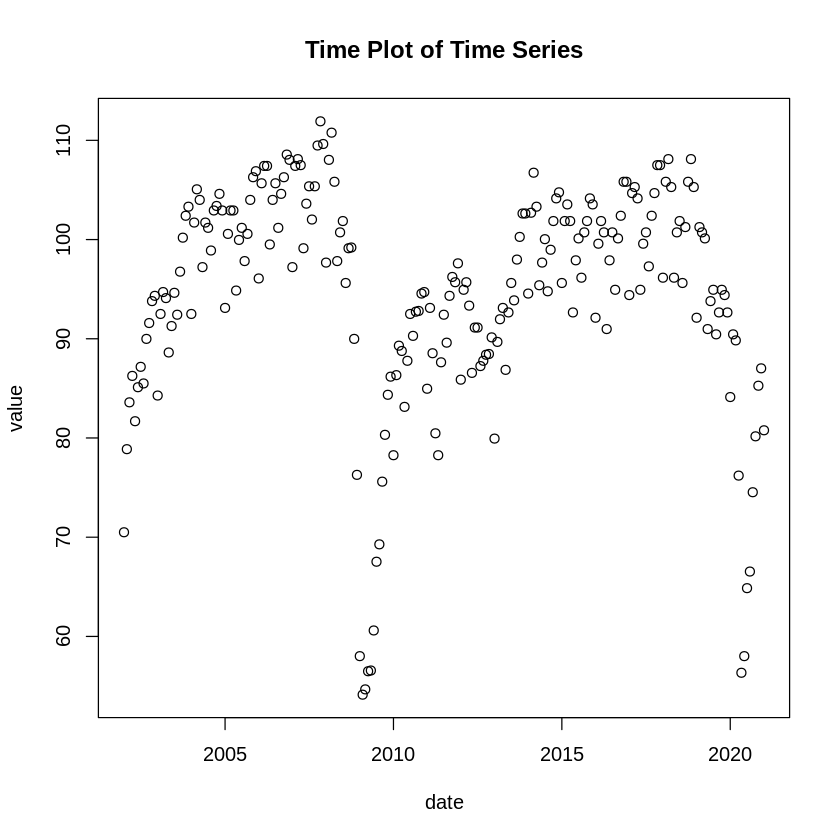

In [ ]:
# plot of the values in function of the date
plot(data2$date, data2$value, main = "Time Plot of Time Series", xlab = "date", ylab = "value")


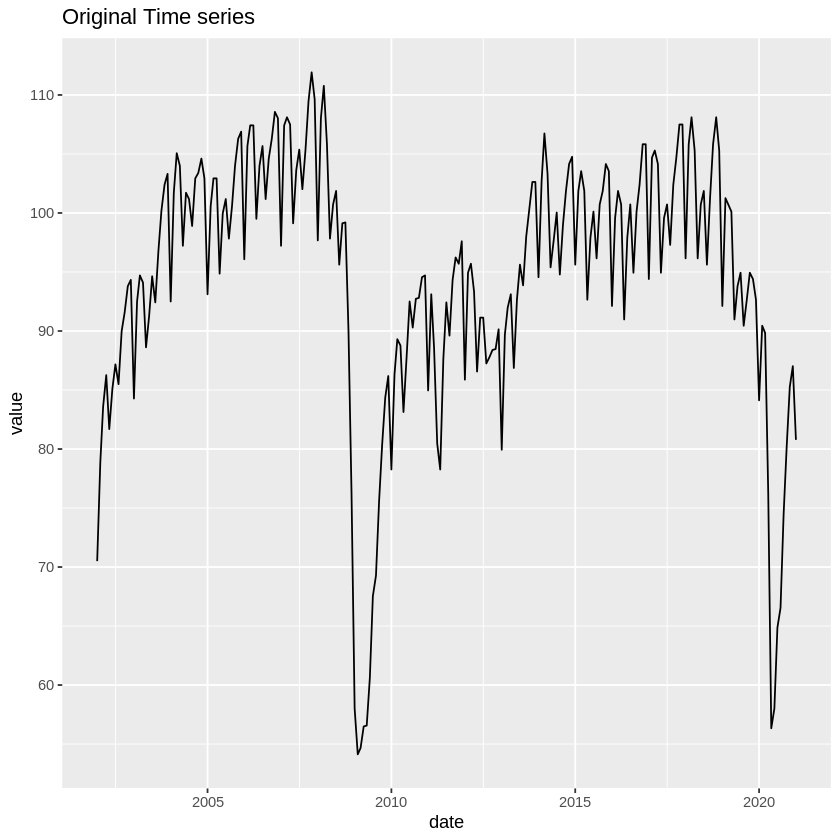

In [ ]:
# Plotting of the time series
ggplot(data = data2, aes(x = date, y = value)) +
  geom_line() +
  labs(title = "Original Time series")



Both the histogram and plots show that there is no visible relationship between the values and dates in the plot.

# Adjustment of the time series

In [ ]:
# Calculate interquartile range (IQR)
q1 <- quantile(data2$value, 0.25, na.rm = TRUE)
q3 <- quantile(data2$value, 0.75, na.rm = TRUE)
iqr <- q3 - q1

# Calculate upper and lower limits
upper_limit <- q3 + 1.5*iqr
lower_limit <- q1 - 1.5*iqr

# Filter out outliers
data2 <- data2 %>%
  filter(value >= lower_limit, value <= upper_limit)


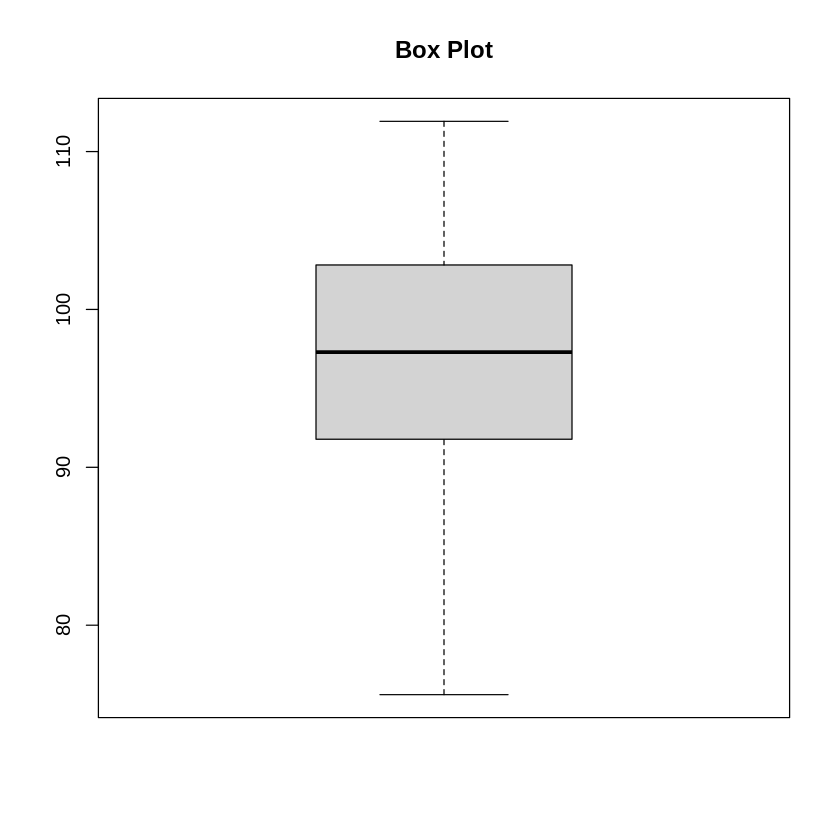

In [ ]:
# Display the boxplot
boxplot (data2$value, data = data2, main = "Box Plot")

There are no outliers left.

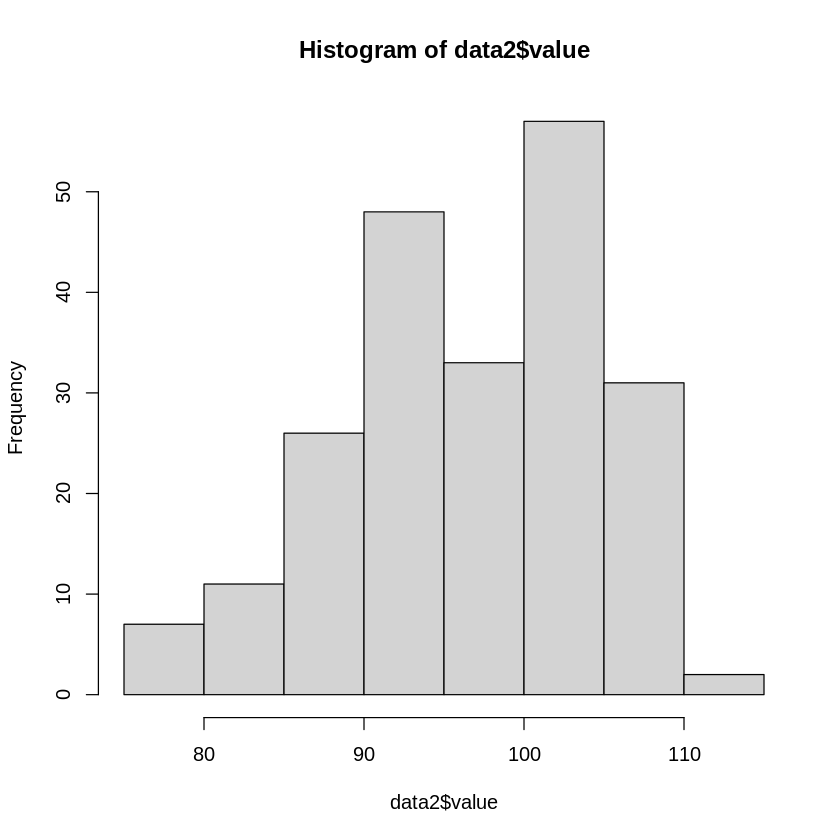

In [ ]:
# Histogram of the value column in the times seies data1
hist(data2$value)

In [ ]:
install.packages("strucchange", repos="http://R-Forge.R-project.org")
library(strucchange)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
t<-c(1:length(data2$value))
p.break<-breakpoints(data2$value~t)
p.break


	 Optimal 5-segment partition: 

Call:
breakpoints.formula(formula = data2$value ~ t)

Breakpoints at observation number:
34 81 131 180 

Corresponding to breakdates:
0.1581395 0.3767442 0.6093023 0.8372093 

The code below is used to detect the breakpoints in the time series data2 which are 4 breakpoints at observation numbers 34, 81, 131 and 184, which correspond to breakdates of 0.1574074, 0.375, 0.6064815, and 0.8518519. This means that the time series can be divided into five segments or regimes, each with its own linear relationship between the response variable (data2$value) and the independent variable (t).






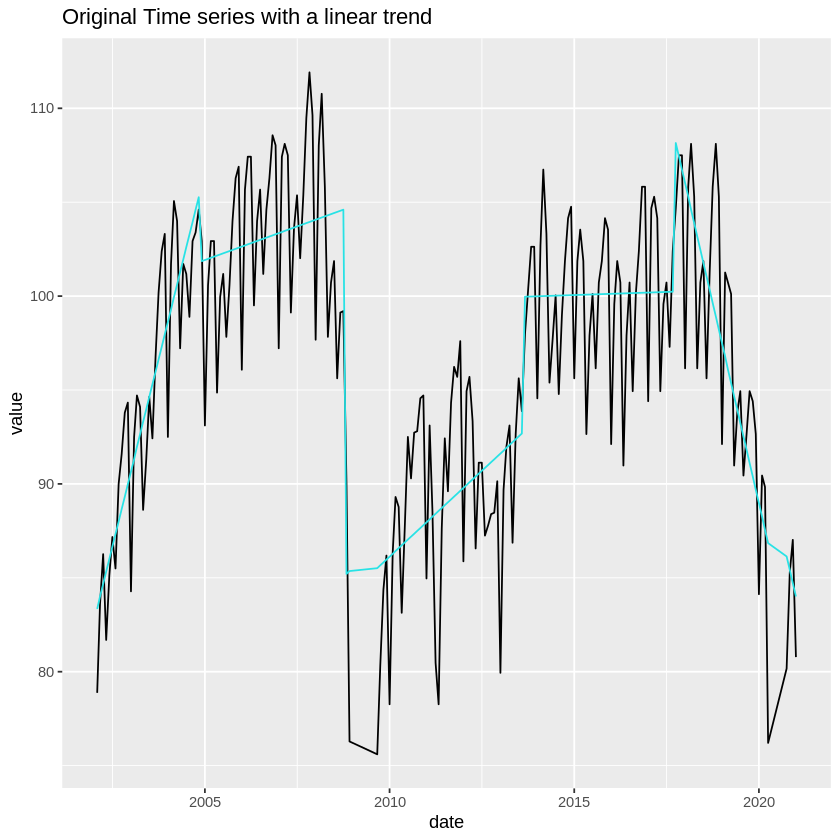

In [ ]:
# display the plot and the segments in each period
ggplot(data = data2, aes(x = date, y = value)) +
  geom_line() +
  labs(title = "Original Time series with a linear trend") +
  geom_line(data = data.frame(date = data2$date, value = fitted(p.break)), aes(x = date, y = value), col = 5)

In [ ]:
# Modeling the linear relationship in each period
model1<-lm(data2$value~breakfactor(p.break)*t)
summary(model1)


Call:
lm(formula = data2$value ~ breakfactor(p.break) * t)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6748  -3.1057   0.5679   3.4027   9.1881 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     82.67701    1.54949  53.358  < 2e-16 ***
breakfactor(p.break)segment2    17.09911    3.22639   5.300 2.98e-07 ***
breakfactor(p.break)segment3    -9.98111    4.90458  -2.035   0.0431 *  
breakfactor(p.break)segment4    16.56275    7.16059   2.313   0.0217 *  
breakfactor(p.break)segment5   154.02319   14.74191  10.448  < 2e-16 ***
t                                0.66437    0.07723   8.602 2.04e-15 ***
breakfactor(p.break)segment2:t  -0.60478    0.09068  -6.670 2.34e-10 ***
breakfactor(p.break)segment3:t  -0.51181    0.08854  -5.780 2.75e-08 ***
breakfactor(p.break)segment4:t  -0.65885    0.08920  -7.386 3.74e-12 ***
breakfactor(p.break)segment5:t  -1.37458    0.10693 -12.856  < 2e-16 ***
---
Signif. codes:

The model has an adjusted R-squared of 0.6891, which means it explains approximately 68.91% of the variance in the data after adjusting for the number of predictors in the model. The breakpoints suggest that the time series can be divided into 5 segments, and each segment has a different intercept and slope. The t-values of the coefficients indicate that all variables are significant at the 5% level, except for the fourth segment, which has a p-value of 0.0606. The residuals have a standard error of 4.466. Overall, the model seems to fit the data reasonably well.

# Analysis and modeling of the residuals resulting from the adjustment

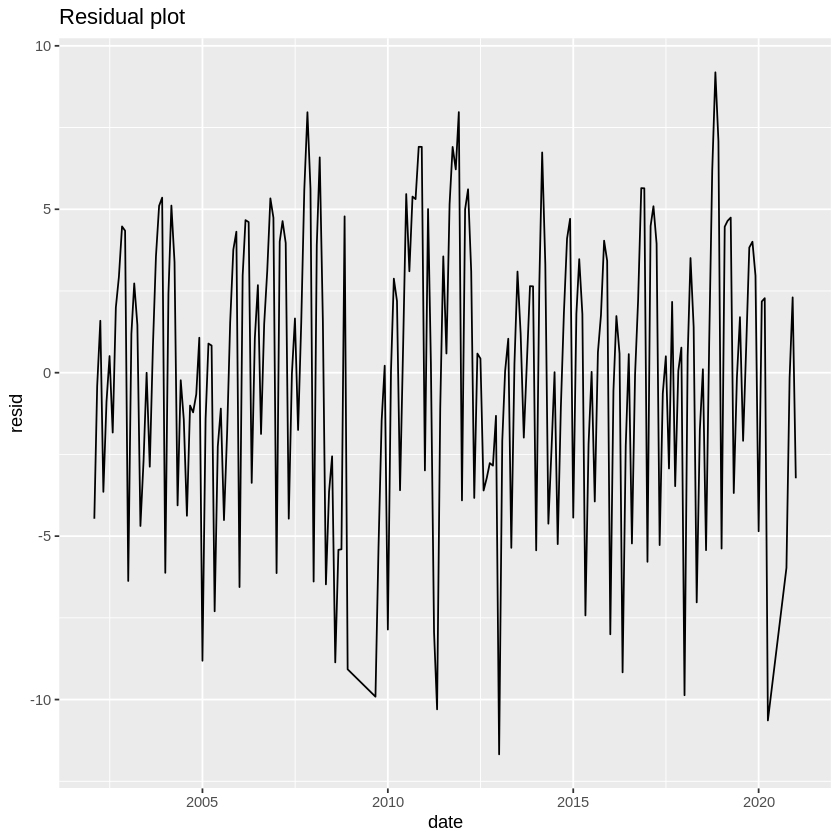

In [ ]:
# Obtain residuals from the linear model
resid <- residuals(model1)

# Create a dataframe with date and residuals
resid_df <- data.frame(date = data2$date, resid = resid)

# Plot the residuals using ggplot2
ggplot(data = resid_df, aes(x = date, y = resid)) +
  geom_line() +
  labs(title = "Residual plot")



Call:
arima(x = data2$value, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.2071  -0.6755
s.e.  0.1063   0.0747

sigma^2 estimated as 23.74:  log likelihood = -642.73,  aic = 1291.47

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.03723632 4.861474 3.863124 -0.1707708 4.111918 0.9081557
                   ACF1
Training set 0.03511861

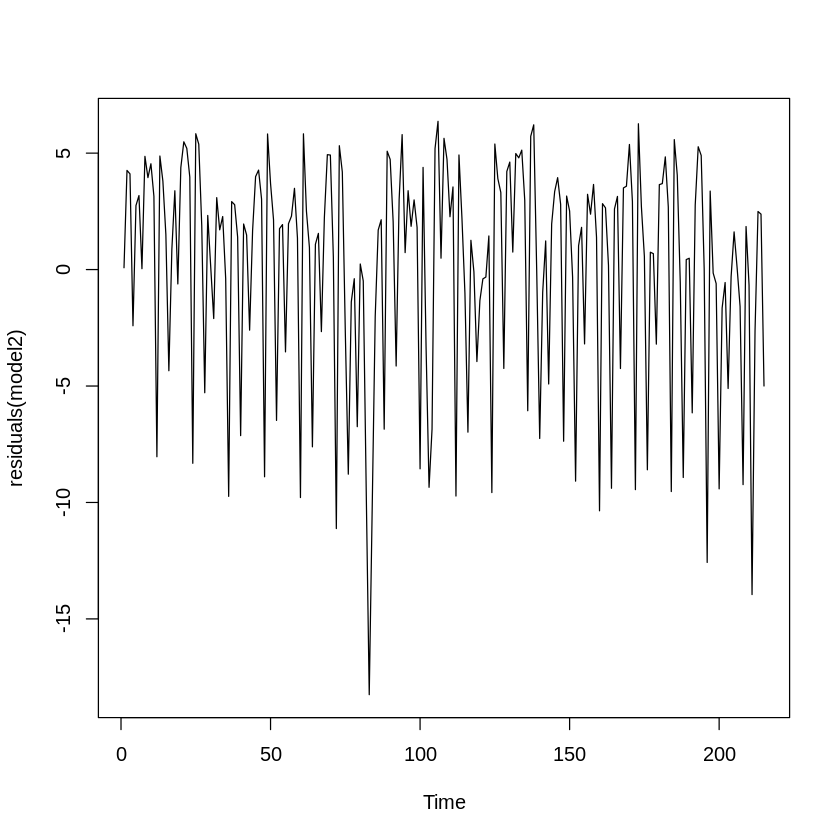

In [ ]:
# Fit an ARIMA(1,1,1) model to the data
model2 <- arima(data2$value, order=c(1,1,1))

# Print the model summary
summary(model2)

# Plot the residuals
plot(residuals(model2))

In [ ]:
# Test for stationarity using the Augmented Dickey-Fuller test
adf_test <- adf.test(residuals(model2))

# Check the p-value
if (adf_test$p.value < 0.05) {
    print("The residuals are stationary")
} else {
    print("The residuals are not stationary")
}

Warning message in adf.test(residuals(model2)):
“p-value smaller than printed p-value”


[1] "The residuals are stationary"


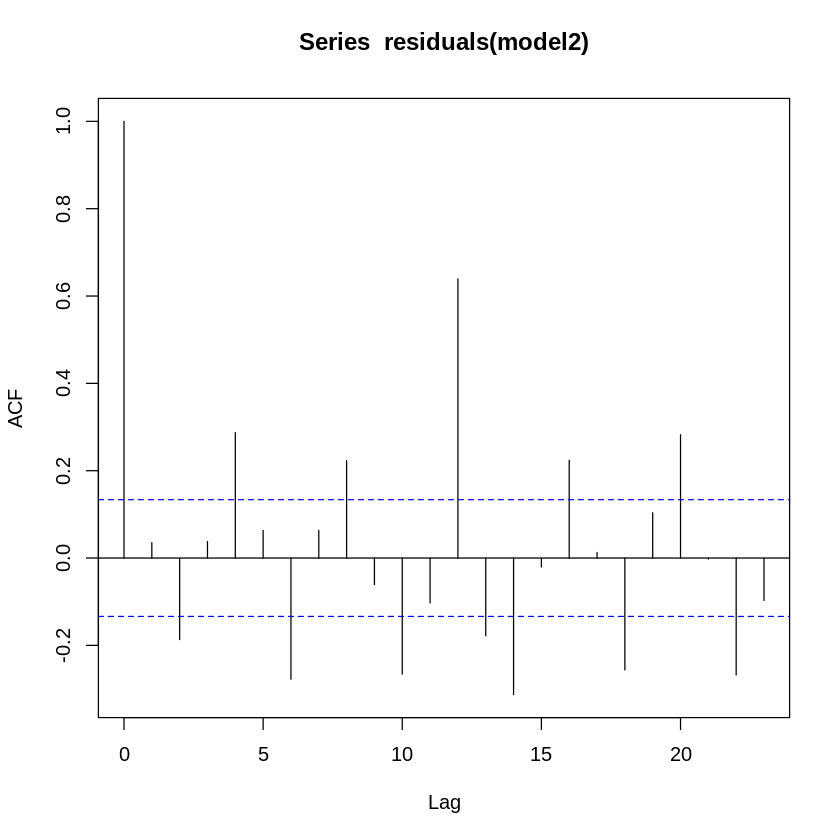

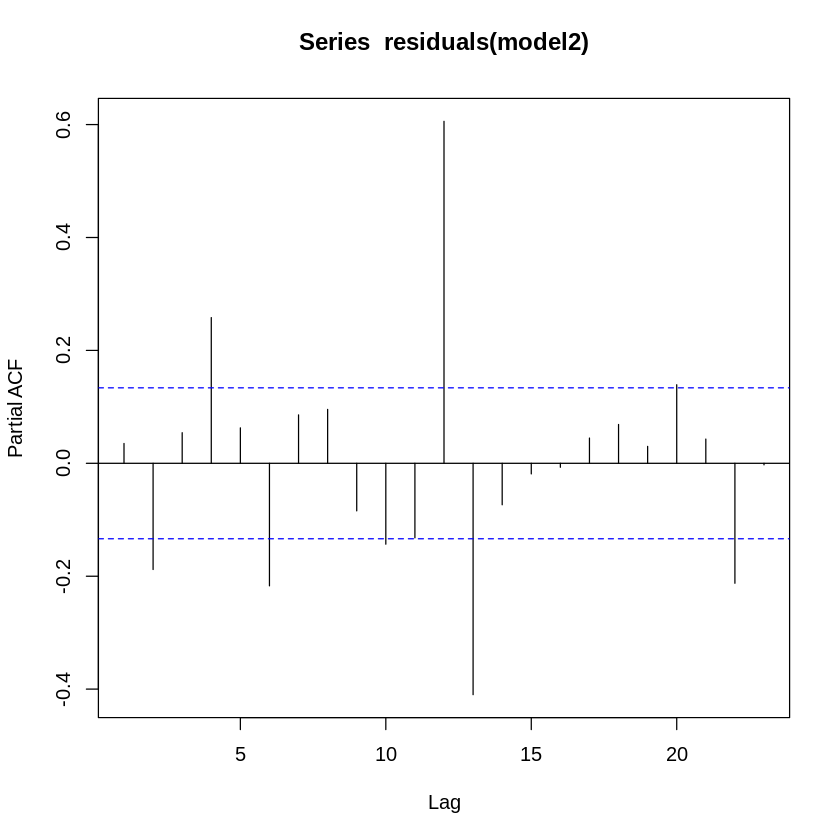

In [ ]:
# Plot the ACF and PACF of the residuals
acf(residuals(model2))
pacf(residuals(model2))

In [ ]:
# Estimate candidate ARIMA models using maximum likelihood estimation
model1 <- arima(residuals(model2), order=c(1,0,0))
model2 <- arima(residuals(model2), order=c(0,0,1))
model3 <- arima(residuals(model2), order=c(1,0,1))

In [ ]:
# Evaluate the estimated ARIMA models using diagnostic checks
# For example:
# Ljung-Box test for model 1
ljung_box <- Box.test(model1$residuals, lag=70, type="Ljung-Box")
if (ljung_box$p.value < 0.05) {
    print("Model 1 is not a good fit")
} else {
    print("Model 1 is a good fit")
}

[1] "Model 1 is not a good fit"


Series: data2$value 
ARIMA(1,0,5) with non-zero mean 

Coefficients:
         ar1     ma1     ma2     ma3     ma4     ma5     mean
      0.5367  0.0500  0.0545  0.2535  0.4615  0.2587  96.2310
s.e.  0.1014  0.1086  0.0568  0.0635  0.0814  0.0861   1.3906

sigma^2 = 21.94:  log likelihood = -634.77
AIC=1285.55   AICc=1286.25   BIC=1312.51

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.0808621 4.606965 3.62808 -0.1755565 3.845167 0.8529007
                    ACF1
Training set -0.02781215

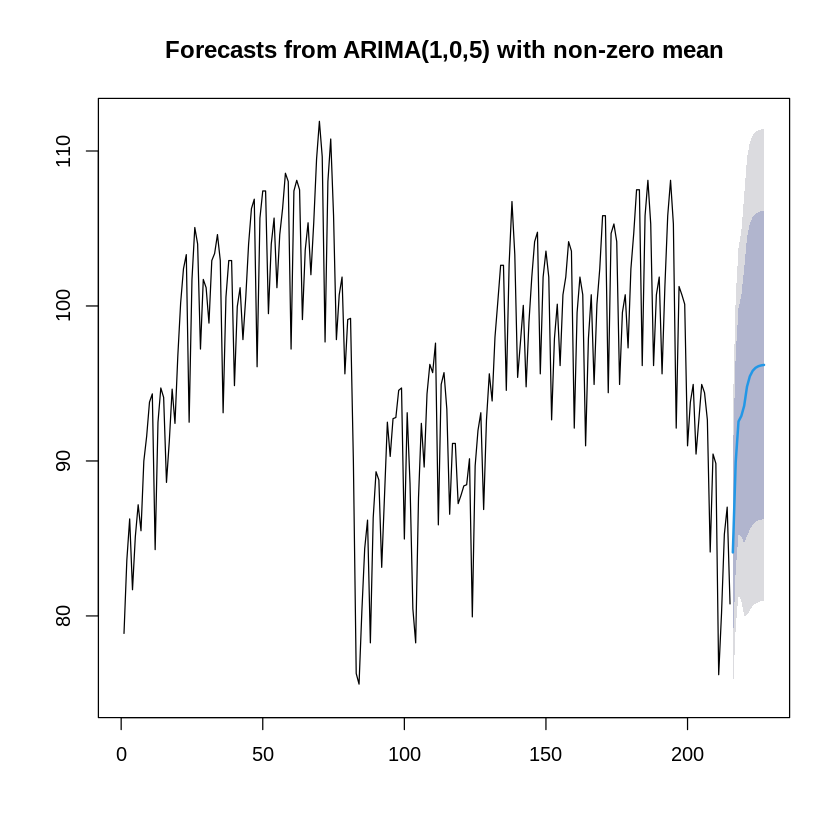

In [ ]:
library(forecast)

# Fit the ARIMA model to the time series data
model <- auto.arima(data2$value, seasonal=TRUE)

# Print the model summary
summary(model)

# Make forecasts using the fitted model
forecast <- forecast(model, h=12)

# Plot the forecasts
plot(forecast)